Steps:
1. Download datasets
2. And check them
3. Make model
4. Instantiate
5. Check forward propagation
6. Train model
7. Test after training

Modules to split:
1. Downloading datasets appropriately
2. Pytorch model
3. A trainer
4. A tester

Things to do in notebook:
- Check if the modules do their job.
- Previewing their outputs and fast iterations.

In [5]:
# !pip install torchvision
# !pip install dotmap

import importlib
import datasets

Splitting into train and validation dataset


<module 'datasets' from '/Users/krischal/Desktop/code/torch-playground/a-sample-project/datasets.py'>

Splitting into train and validation dataset
torch.Size([1, 28, 28])


Text(0.5, 0, '2')

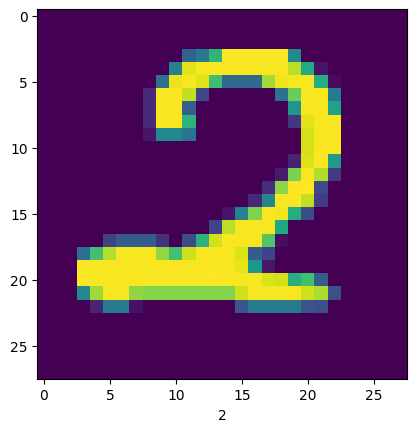

In [15]:
importlib.reload(datasets)
import matplotlib.pyplot as plt

x, y = datasets.random_test_sample()
print(x.shape)
plt.imshow(x[0])
plt.xlabel(f"{y}")
# x.shape

In [11]:
import torch
device = torch.device("mps")
myx = x.to(device)
# myx = datasets.sample_test()[0].to(device)
# myx.unsqueeze(1).shape
myx = torch.unsqueeze_copy(myx, 1)
myx.shape
# myx.dtype

torch.Size([1, 1, 28, 28])

In [2]:
import importlib
import mynet_model

In [61]:
importlib.reload(mynet_model)
model = mynet_model.myNet().to(device)

torch.float32

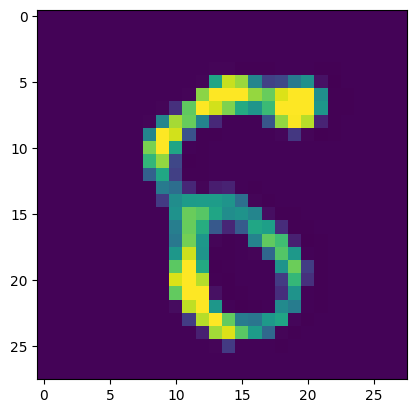

In [36]:
# output = model(myx.unsqueeze(1))
output = model(myx)
plt.imshow(output[0,0].detach().cpu())
output.shape
output.dtype

In [20]:
import train

In [53]:
for x,y in datasets.dataset.trainLoader:
    print(x.shape)
    break

torch.Size([64, 1, 28, 28])


In [35]:
importlib.reload(train)
model = train.instantiate_models()

summary = train.train_one_epoch(True)
train.save_models()
summary

Splitting into train and validation dataset
Instantiating Models
Splitting into train and validation dataset
Training one epoch


Training took  40.76461386680603


DotMap(Train Loss=6.1742394980974495, Validation Loss=2.3413091329857707, Training time=40.76461386680603, Time Taken=43.41195797920227, _ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

In [34]:
train.H.train_loss
train.H.validation_loss

[2.679630372879353, 2.2090838249693525]

In [20]:
# plt.plot(train.H.train_loss)

In [41]:
from pprint import pprint
pprint(summary.toDict())

{'Time Taken': 37.7804811000824,
 'Train Loss': 22.63032946176827,
 'Training time': 35.53435802459717,
 'Validation Loss': 8.111479669809341,
 '_ipython_display_': {},
 '_repr_html_': {},
 '_repr_javascript_': {},
 '_repr_jpeg_': {},
 '_repr_json_': {},
 '_repr_latex_': {},
 '_repr_markdown_': {},
 '_repr_mimebundle_': {},
 '_repr_pdf_': {},
 '_repr_png_': {},
 '_repr_svg_': {}}


Instantiating Models
Splitting into train and validation dataset
Splitting into train and validation dataset


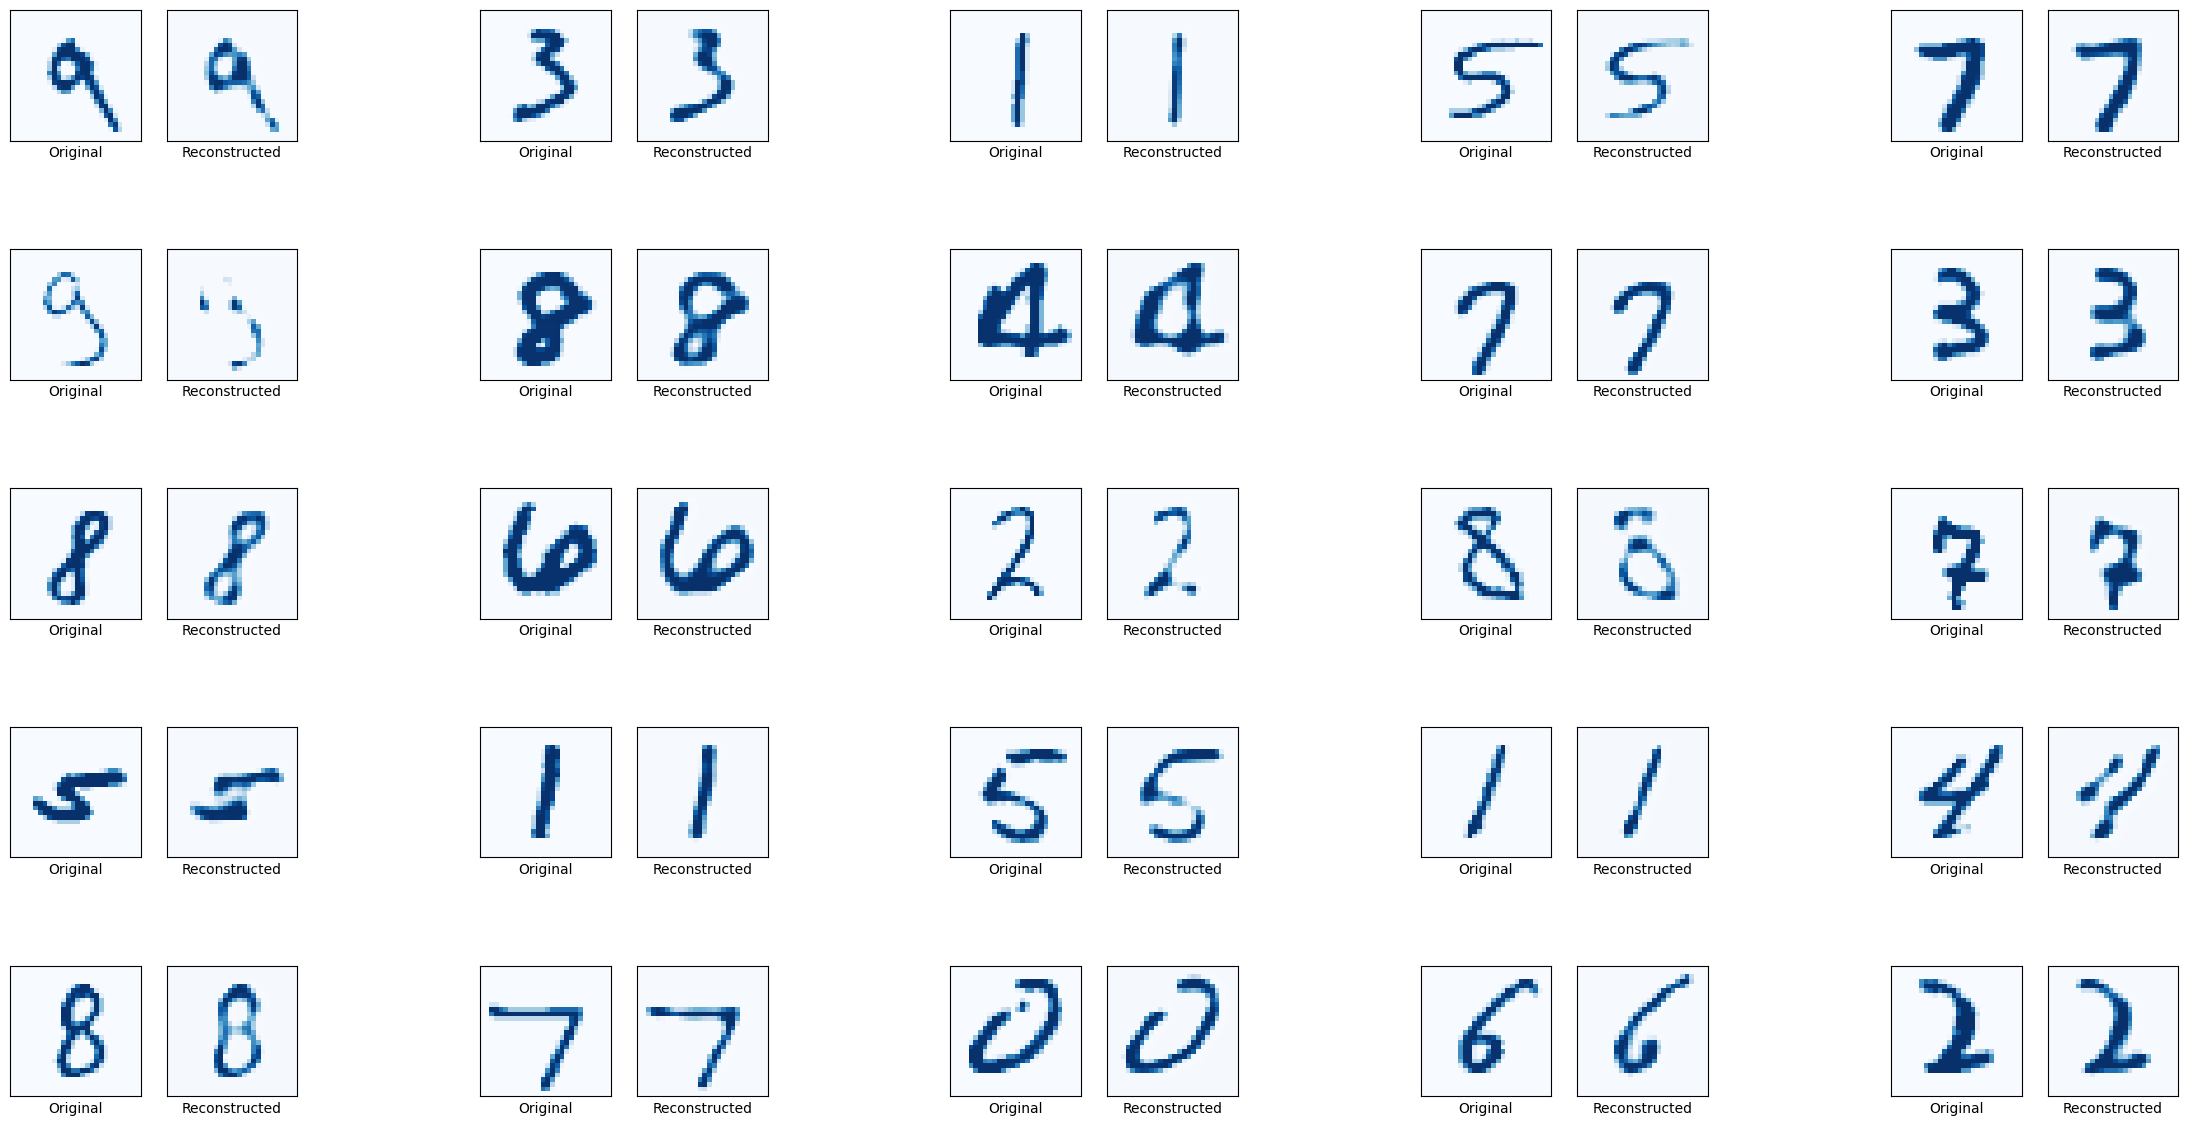

In [34]:
model = train.instantiate_models()
import eval
importlib.reload(eval)
eval.evaluate(model, "output.png")